## Introduction

The EDA explores the data on loan applications to a bank, including various types of information on the applicant and the purpose of the loan, along with the eventual loan decision (approve or reject)

In [1]:
# Required libraries importation.

import pandas as pd
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from bokeh.io import output_notebook
output_notebook()
from bokeh.plotting import figure
from bokeh.io import show
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/Users/Mcsteve/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/Mcsteve/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Loading BokehJS ...

In [2]:
# Load the data into a Dataframe and display the first few entries.

loan_df = pd.read_csv("files/loanapp.csv")
loan_df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [3]:
# Examine the shape of the dataset

loan_df.shape

(500, 15)

There are 500 rows/records in the dataset and 15 columns.

In [4]:
# Display initial critical information about the Dataset

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             491 non-null    object 
 3   Married            497 non-null    object 
 4   Dependents         488 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      473 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         482 non-null    float64
 10  Loan_Amount_Term   486 non-null    float64
 11  Credit_History     459 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 58.7+ KB


In [15]:
# Remove the $ symbol from the total income column.

loan_df['Total_Income'] = loan_df['Total_Income'].str.replace('$', '').astype(float)

In [16]:
# Check for missing values in the Dataset
print(loan_df.isna().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
Total_Income         0
Unnamed: 0           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64


We can immediately observe that there are indeed columns containing some missing values.

In [5]:
# Display columns with missing values

loan_df.columns[loan_df.isna().any()]

Index([], dtype='object')

There are 7 columns with missing values highlighted in the list above.

In [4]:
# Missing value treatment by imputation.

from sklearn.impute import SimpleImputer

def handle_missing_values(df):
    # Instantiate the simple imputer class to fill categorical and numerical variables.
    num_imputer = SimpleImputer(strategy="median")
    cat_imputer = SimpleImputer(strategy="most_frequent")
    
    # Split the DataFrame object into numerical and categorical columns.
    df_num = df.select_dtypes(include=['int64', 'float64'])
    df_cat = df.select_dtypes(include=['object'])
    num_transformed = num_imputer.fit_transform(df_num)
    cat_transformed = cat_imputer.fit_transform(df_cat)
    clean_df_cat = pd.DataFrame(cat_transformed, columns=df_cat.columns)
    clean_df_num = pd.DataFrame(num_transformed, columns=df_num.columns)
    clean_df = clean_df_cat.join(clean_df_num)
    return clean_df

loan_df = handle_missing_values(loan_df)

In [6]:
# Check for presence of missing values in the Dataset.
print(loan_df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
Total_Income         0
Unnamed: 0           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64


In [7]:
# Examine the first few records.

loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Total_Income,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001002,Male,No,0,Graduate,No,Urban,Y,$5849.0,0.0,5849.0,0.0,126.5,360.0,1.0
1,LP001003,Male,Yes,1,Graduate,No,Rural,N,$6091.0,1.0,4583.0,1508.0,128.0,360.0,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y,$3000.0,2.0,3000.0,0.0,66.0,360.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y,$4941.0,3.0,2583.0,2358.0,120.0,360.0,1.0
4,LP001008,Male,No,0,Graduate,No,Urban,Y,$6000.0,4.0,6000.0,0.0,141.0,360.0,1.0


We now have no missing values in the dataset.

In [13]:
# Displays the df information again.

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            500 non-null    object 
 1   Gender             500 non-null    object 
 2   Married            500 non-null    object 
 3   Dependents         500 non-null    object 
 4   Education          500 non-null    object 
 5   Self_Employed      500 non-null    object 
 6   Property_Area      500 non-null    object 
 7   Loan_Status        500 non-null    object 
 8   Total_Income       500 non-null    float64
 9   Unnamed: 0         500 non-null    float64
 10  ApplicantIncome    500 non-null    float64
 11  CoapplicantIncome  500 non-null    float64
 12  LoanAmount         500 non-null    float64
 13  Loan_Amount_Term   500 non-null    float64
 14  Credit_History     500 non-null    float64
dtypes: float64(7), object(8)
memory usage: 58.7+ KB


In [8]:
# Display descriptive stats on the dataset

loan_df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Total_Income,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,500,500,500,500,500,500,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
unique,500,2,2,4,2,2,3,2,457,NaN,NaN,NaN,NaN,NaN,NaN
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y,$6000.0,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,409,325,300,393,434,188,345,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.500000,5493.644000,1506.307840,143.390000,343.032000,0.856000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.481833,6515.668972,2134.432188,80.912091,62.999117,0.351441
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.750000,2874.500000,0.000000,100.000000,360.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.500000,3854.000000,1125.500000,126.500000,360.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,374.250000,5764.000000,2253.250000,160.000000,360.000000,1.000000


Display of Descriptive statistics on the dataset revealed the following information;

1. The average loan amount was £143.39 with standard Deviation of 80.912, the highest loan amount approved was £700 with the lowest being £17.

2. The average income of applicants was £5493.644 with standard Deviation of 6515.66, the applicant with the highest income was £81000 with the lowest being £150. The huge spread in applicants income is especially highlighted by the standard deviation here.

3. Majority of the loan applicants were married white males who had never filed for bankruptcy.

## Categorical Variables

In [9]:
# Function to plot a bar chart of the unique values of a variable.

def plot_bar_chart(df, column, title, color):
    df[column].value_counts().plot(kind='barh', title=title, color=color, figsize=(8,6), rot=0)
    print(df[column].value_counts())

In [29]:
# Function to make a piechart of values in a column.

def plot_pie_chart(df, column, title, color):
    df[column].value_counts().plot(kind='pie', title=title, colormap=color,figsize=(8,6), rot=0, autopct= "%1.1f%%")
    print(df[column].value_counts())

<h3>1. Employment Status</h3>

No     434
Yes     66
Name: Self_Employed, dtype: int64


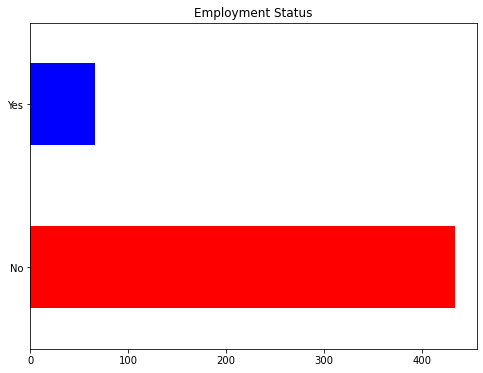

In [12]:
# Displays the distribution of applicant's employment status

plot_bar_chart(loan_df, 'Self_Employed', 'Employment Status', ['red', 'blue'])

The plot above shows that majority of the loan applicants were workers who had to depend on a salary with just 13.2% of applicants (66 out of 500) being self employed.

<h3>2. Loan Decision</h3>

Y    345
N    155
Name: Loan_Status, dtype: int64


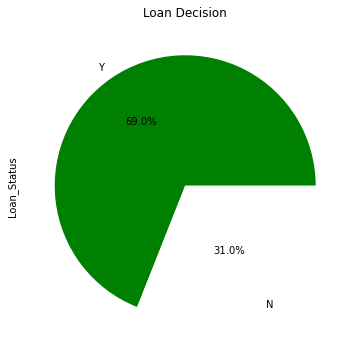

In [42]:
# Display the distribution of the loan decision of applicants.

plot_pie_chart(loan_df, 'Loan_Status', 'Loan Decision', 'ocean')

The plot above shows the distribution of the loan decision. A higher proportion of the loans were approved with 345 out of the 500 (equivalent to 69%) receving a yes.

<h3>3. Marital Status</h3>

Yes    325
No     175
Name: Married, dtype: int64


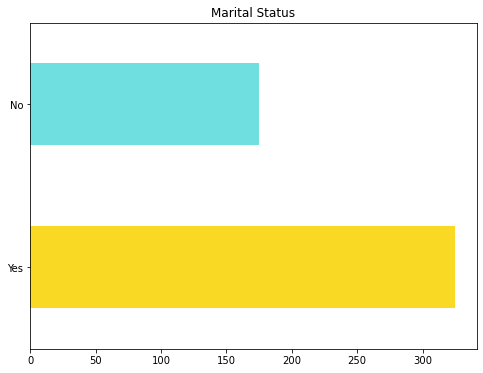

In [ ]:
plot_bar_chart(loan_df, 'Married', 'Marital Status', ['#F9D923', '#6FDFDF'])

The plot above shows the marital status of the applicants. Married people constitute the majority of the applicants with 325 of 500 (65%).

<h3>4. Applicant Gender</h3>

Male      409
Female     91
Name: Gender, dtype: int64


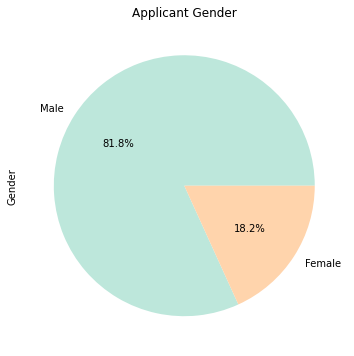

In [46]:
plot_pie_chart(loan_df, 'Gender', 'Applicant Gender', 'icefire')

The chart above shows the distribution of the applicant's gender. The male gender dominates the applicants with a whooping 81.8% (409 out of 500) while the female gender constituted 18.2% (91 of 500) of the loan applicants.

## Continuous Variables

In [10]:
# Function to plot the distribution of continuous variables.
def plot_histogram(df, column, title):
    df.hist(column=column, bins=10, figsize=(11,8))
    plt.title(title)

<h3>1. Loan Amount</h3>

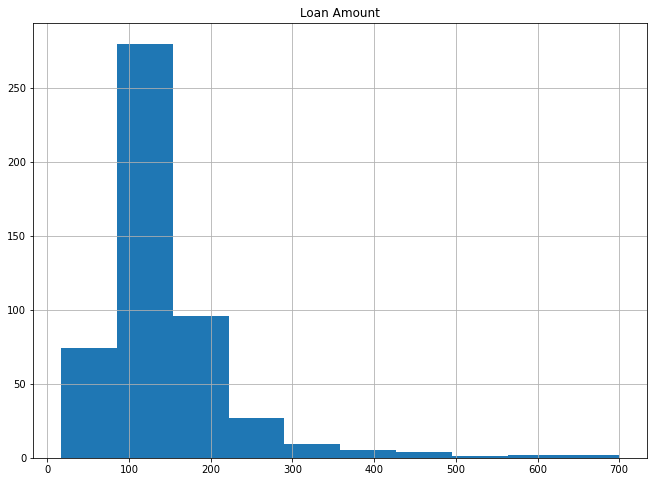

In [23]:
# Display the distribution of the Loan Amount.

plot_histogram(loan_df, 'LoanAmount', 'Loan Amount')

From the above plot, we can quickly see observe that the Loan Amount is asymmetric and right skewed as a result of the lower bound in the variable as observed in the descriptive statistics.

<h3>2. Applicant's Income</h3>

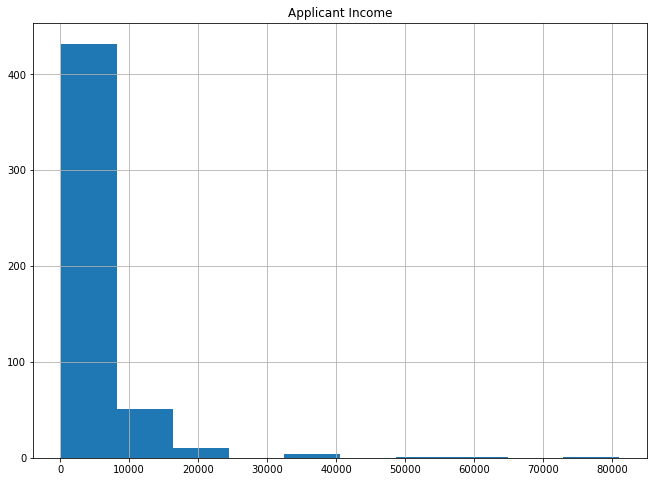

In [24]:
# Display the distribution of the applicant income.

plot_histogram(loan_df, 'ApplicantIncome', 'Applicant Income')

The histogram above shows the distribution of the applicant's income. We can also observe a right skew on this variable with a huge chunk of applicants having income ranging from £150 to £24000 with the highest applicant representing more of an outlier with income of £81,000 so far away from majority of the others.

<h3>3. Co-Applicant's Income.</h3>

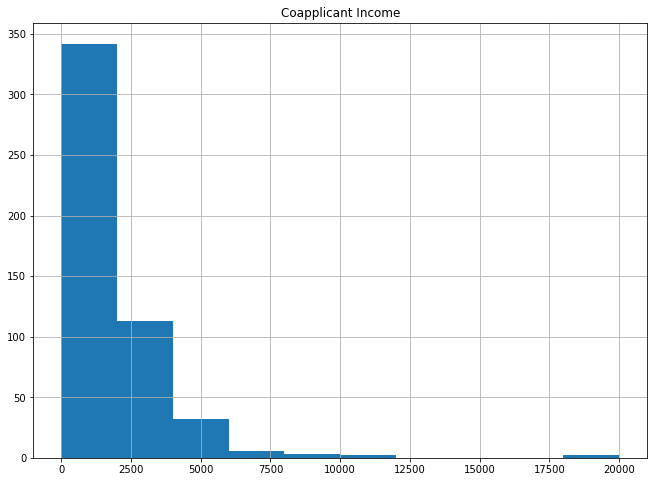

In [25]:
plot_histogram(loan_df, 'CoapplicantIncome', 'Coapplicant Income')

The histogram above shows the distribution of the Co applicant's income. We can also observe a right skew on this variable with a huge chunk of Co applicants having income ranging from £0 to £6000 with the highest Co-applicant out on their own with income of £20000.

<h3>4. Total Income</h3>

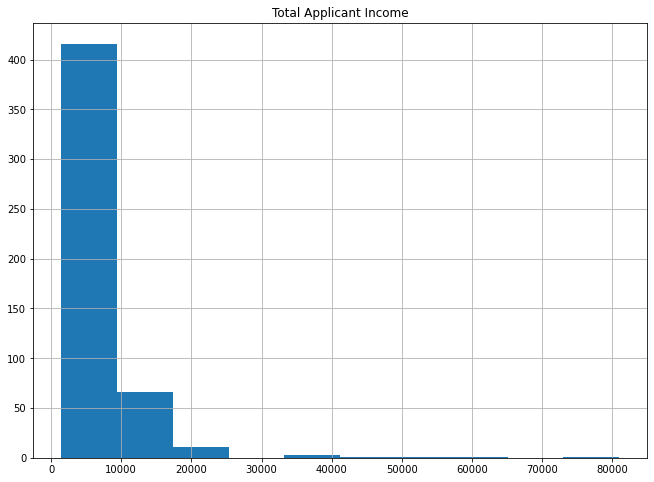

In [16]:
plot_histogram(loan_df, 'Total_Income', 'Total Applicant Income')

The total income districution is very similar to what we've observed with the Applicant and Co-applicant income with a right skew and outliers around £72000 - £81000. A bulk of applicants total income was within £1442 and £24000.

## Variable Correlation.

In [11]:
# Function to plot a scatter diagram that shows the correlation between two variables.

def make_scatter_plot(df, column1, column2, title):
    """
    df = DataFrame object.
    column1 = column name of the first variable.
    column2 = column name of the second variable.
    title = desired title of the plot.
    """
    plt.scatter(df[column1], df[column2])
    plt.title(title)
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show()

In [12]:
# Function to make a boxplot.

def make_box_plot(df, column1, column2):
    """
    df = DataFrame object.
    column1 = column name of the variable.
    title = desired title of the plot.
    """
    df.boxplot(column=column1, by=column2, figsize=(8,6))

In [13]:
# Function to display the coefficient of pearson correlation between two variables.

def show_correlation(df, column1, column2):
    """
    df = DataFrame object.
    column1 = column name of the first variable.
    column2 = column name of the second variable.
    """
    corr = df[column1].corr(df[column2], method='pearson')
    print(corr)

<h3>1. Applicant Income vs Loan amount</h3>

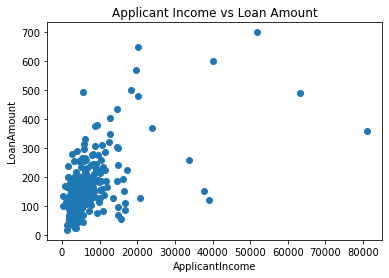

0.5770429809886392


In [27]:
# Display illustration and correlation between the Applicant income 
# and loan amount on a scatter plot.

make_scatter_plot(loan_df, 'ApplicantIncome', 'LoanAmount', 'Applicant Income vs Loan Amount')
show_correlation(loan_df, 'ApplicantIncome', 'LoanAmount')

The scatter plot shown above illustrates the correlation between the Applicant's Income and the Loan Amount, as we may have guessed it highlights a positive correlation which is confirmed by the correlation coefficient of 0.577 which denotes an average degree of positive correlation. 

<h3>2. Total Income vs Loan Amount</h3>

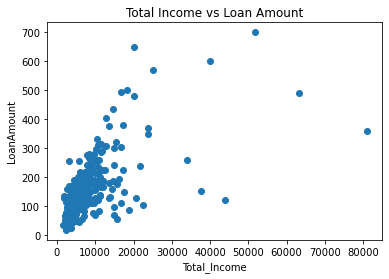

0.6360064156336597


In [28]:
# Display illustration and correlation between the applicant income 
# and loan amount on a scatter plot.

make_scatter_plot(loan_df, 'Total_Income', 'LoanAmount', 'Total Income vs Loan Amount')
show_correlation(loan_df, 'Total_Income', 'LoanAmount')

The scatter plot for total income vs loan amount is very similar to what we saw with that of applicant's income. This particular plot illustrates a more positive corelation between both variables confirmed by a much higher pearson correlation coefficient of 0.636.

<h3>3. Loan Amount grouped by Property Area of Applicant.</h3>

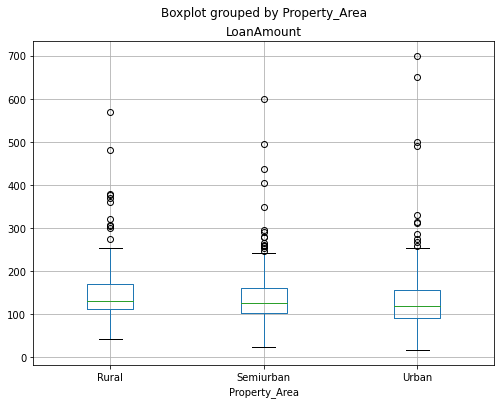

In [41]:
make_box_plot(loan_df, 'LoanAmount', 'Property_Area')

The boxplot above shows the loan amount grouped by the property type of applicants. Fascinatingly, the median loan amount is very similar for the different property types. Noticeably, we can see the presence of many outliers across the different property areas evidenced by many data points outside the whiskers.

<h3>4. Applicant Income by Employment Status.</h3>

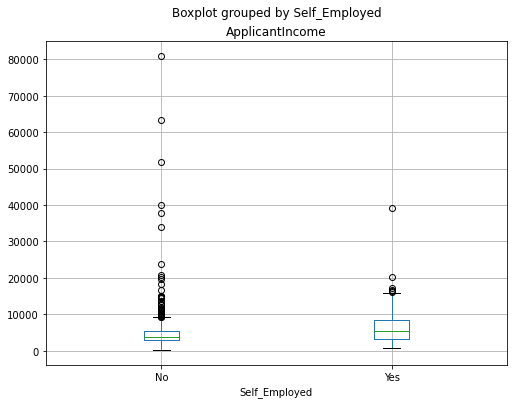

In [50]:
make_box_plot(loan_df, 'ApplicantIncome', 'Self_Employed')

The boxplot above shows the applicants income by employment status. Self Employed applicants had fewer outlier values outside the whisker but interstingly, the applicants with the highest income were not self employed.

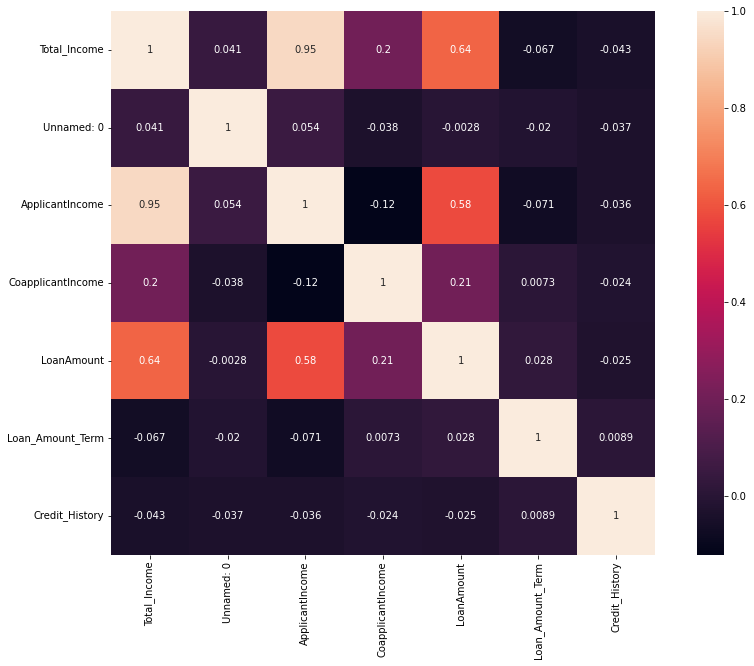

In [21]:
# Display the correlation between independent variables in the dataset.

corr = loan_df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

A quick glance at the heatmap showing the correlation between the independent variables in the data set indicates that there's very low correlation between almost all the variables with the loan amount and total income and applicant's income showing medium correlation with coefficients of 0.64 and 0.58 respectively. This indicates that there's not so much multicollinearity among the independent variables which bode well for a potential model fit of the dataset although it must be pointed out the extremely high correlation coefficient between the Total Income and Applicant's Income due to being a direct product.

## Further Variable Analysis

In [ ]:
# Create a contingency table to highlight the marital status by gender.

def make_cont_table(df, column1, column2):
    cont_table = pd.crosstab(df[column1], df[column2])
    cont_table.plot(kind ="bar",stacked =False, rot=0)
    return cont_table

<h3>Gender and Marital Status</h3>

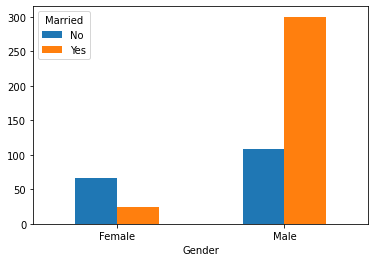

In [55]:
cont = make_cont_table(loan_df, 'Gender', 'Married')

The contingency table represents the observed frequencies of applicants by marital status and gender. 

From the contigency table and subsequent bar graph illustration, it is hard to really establish whether there's significant dependence of the marital status on an applicant's gender. A huge chunk of the males in the dataset (300 of 409) were married as opposed to the females whose majority were single (66 of 91).

In [56]:
# Perform a chi squared test on the two variables to determine their independence

from scipy import stats

chi2,p_val,dof,expected=stats.chi2_contingency(cont)
print(f"p-value:{p_val}")

p-value:2.9086066950743696e-16


After conducting a chi squared test on the marital status and gender, the observed p-value was very minute and greatly less than the usual significance level of 0.05. Therefore, **we reject the null hypothesis that there is indeed no dependence between the gender and marital status of an applicant**. 

Indeed it was more likely for a married applicant to be male as proved by the statistical test.

<h3>Gender and Loan Status</h3>

In [61]:
# Creates a new Dataframe of Men whose loan amount exceeded the average.

subset_male = loan_df[(loan_df.Gender=="Male")&(loan_df.Loan_Status=='Y')]
subset_male.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Total_Income,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001002,Male,No,0,Graduate,No,Urban,Y,5849.0,0.0,5849.0,0.0,126.5,360.0,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y,3000.0,2.0,3000.0,0.0,66.0,360.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y,4941.0,3.0,2583.0,2358.0,120.0,360.0,1.0
4,LP001008,Male,No,0,Graduate,No,Urban,Y,6000.0,4.0,6000.0,0.0,141.0,360.0,1.0
5,LP001011,Male,Yes,2,Graduate,Yes,Urban,Y,9613.0,5.0,5417.0,4196.0,267.0,360.0,1.0


In [62]:
subset_male.describe()

,Total_Income,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,285.000000,285.000000,285.00000,285.000000,285.000000,285.000000,285.000000
mean,7181.589193,249.985965,5537.85614,1643.733053,143.873684,338.021053,0.982456
std,6460.149212,144.408726,6457.35067,2023.663271,82.040042,66.850787,0.131517
min,2385.000000,0.000000,674.00000,0.000000,17.000000,12.000000,0.000000
25%,4403.000000,126.000000,2833.00000,0.000000,102.000000,360.000000,1.000000
50%,5529.000000,247.000000,3900.00000,1447.000000,126.500000,360.000000,1.000000
75%,7740.000000,376.000000,5819.00000,2340.000000,162.000000,360.000000,1.000000
max,63337.000000,498.000000,63337.00000,20000.000000,700.000000,480.000000,1.000000


In [ ]:
subset_female = loan_df[(loan_df.Gender=="Female")&(loan_df.Loan_Status=='Y')]
subset_female.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Total_Income,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
29,LP001087,Female,No,2,Graduate,No,Semiurban,Y,5833.0,29.0,3750.0,2083.0,120.0,360.0,1.0
37,LP001112,Female,Yes,0,Graduate,No,Semiurban,Y,5126.0,37.0,3667.0,1459.0,144.0,360.0,1.0
45,LP001137,Female,No,0,Graduate,No,Urban,Y,3410.0,45.0,3410.0,0.0,88.0,360.0,1.0
49,LP001151,Female,No,0,Graduate,No,Semiurban,Y,6275.0,49.0,4000.0,2275.0,144.0,360.0,1.0
50,LP001155,Female,Yes,0,Not Graduate,No,Semiurban,Y,3572.0,50.0,1928.0,1644.0,100.0,360.0,1.0


In [66]:
subset_female.describe()

,Total_Income,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,5377.800000,264.266667,4559.800000,818.000000,117.716667,350.400000,0.983333
std,3162.652919,135.606593,3284.149833,1533.469203,47.929978,44.616331,0.129099
min,1963.000000,29.000000,210.000000,0.000000,30.000000,84.000000,0.000000
25%,3473.500000,140.000000,2906.750000,0.000000,92.250000,360.000000,1.000000
50%,4311.000000,274.500000,3646.000000,0.000000,118.000000,360.000000,1.000000
75%,6171.250000,371.000000,4442.750000,1581.000000,135.000000,360.000000,1.000000
max,17263.000000,495.000000,17263.000000,8980.000000,280.000000,360.000000,1.000000


From the above table, there are 285 men whose loan request was approved in the dataset. This was a higher proportion of the total number of men in the dataset (285 of 409) and comparing with the women, 60 of the 91 women got their loan approved, this would indicate that gender was not indeed a factor that determined whether or not the applicant's loan request was approved. Although it must be noted that further tests could be carried out to verify the authenticity of this inference made based on this criteria.

<h3>Gender, Marital Status, Loan Amount and Loan Decision.</h3>

In [74]:
# Creates a DataFrame of married males whose loan amounts 
# exceeded the average and got approved.

subset_married_male = loan_df[(loan_df.Married=='Yes') & (loan_df.Gender=='Male') 
                 & (loan_df.LoanAmount > 144) & (loan_df.Loan_Status=='Y')]
subset_married_male.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Total_Income,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
5,LP001011,Male,Yes,2,Graduate,Yes,Urban,Y,9613.0,5.0,5417.0,4196.0,267.0,360.0,1.0
8,LP001018,Male,Yes,2,Graduate,No,Urban,Y,5532.0,8.0,4006.0,1526.0,168.0,360.0,1.0
12,LP001028,Male,Yes,2,Graduate,No,Urban,Y,11179.0,12.0,3073.0,8106.0,200.0,360.0,1.0
21,LP001046,Male,Yes,1,Graduate,No,Urban,Y,11580.0,21.0,5955.0,5625.0,315.0,360.0,1.0
25,LP001066,Male,Yes,0,Graduate,Yes,Semiurban,Y,9560.0,25.0,9560.0,0.0,191.0,360.0,1.0


In [75]:
# Display descriptive stats of the subset

subset_married_male.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Total_Income,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,75,75,75,75,75,75,75,75,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
unique,75,1,1,4,2,2,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,LP001011,Male,Yes,0,Graduate,No,Semiurban,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,75,75,30,70,61,32,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10610.506667,255.200000,8459.200000,2151.306667,219.746667,339.200000,0.973333
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9312.123065,138.966552,9841.361672,2250.024528,98.117290,58.765682,0.162192
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4570.000000,5.000000,674.000000,0.000000,150.000000,180.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6294.000000,153.000000,4316.500000,0.000000,166.500000,360.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8334.000000,266.000000,5955.000000,1750.000000,186.000000,360.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10874.500000,353.000000,8708.000000,3304.000000,232.000000,360.000000,1.000000


The above table indicates there are 75 married males whose loan amount exceeded the average of 143.27 and their request approved in the dataset.

In [76]:
# Import Researchpy

import researchpy as rp

In [78]:
# Conduct a T-test on the means of the data subset distribution

summary, results = rp.ttest(
    group1= loan_df['ApplicantIncome'][loan_df['Gender']=='Male'],group1_name ="male",
    group2= loan_df['ApplicantIncome'][loan_df['Gender']=='Female'], group2_name ="female")
print(summary)

   Variable      N         Mean           SD          SE    95% Conf.  \
0      male  409.0  5720.706601  7045.189689  348.362210  5035.897783   
1    female   91.0  4473.109890  3014.221633  315.976283  3845.367853   
2  combined  500.0  5493.644000  6515.668972  291.389575  4921.142338   

      Interval  
0  6405.515420  
1  5100.851928  
2  6066.145662  


From the summary results above, the average income of the male applicants was £5720.71 with standard deviation of 7045.19 and a 95% confidence interval mean of £5035.898 while the average income of female applicants was £4473.11, standard deviation of 3014.22 and a 95% confidence interval mean of £3845.37. This highlights a potential disparity in pay gap based on gender.

In [79]:
print(results)

              Independent t-test    results
0  Difference (male - female) =   1247.5967
1          Degrees of freedom =    498.0000
2                           t =      1.6549
3       Two side test p value =      0.0986
4      Difference < 0 p value =      0.9507
5      Difference > 0 p value =      0.0493
6                   Cohen's d =      0.1918
7                   Hedge's g =      0.1915
8               Glass's delta =      0.1771
9                 Pearson's r =      0.0740


The results of the independent t-test of the two sample means yielded a p value of 0.0986 which is slightly greater than the significance level ($\alpha=0.05$), hence the difference between the two means falls outside the rejection area.

Therefore **we accept the null hypothesis that the mean income of male applicants is not different from that of female applicants**.